# 📊 Customer Churn Analysis Report

### Step 1: Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load and Explore Data

In [2]:
df=pd.read_csv("Customer Churn.csv", encoding= 'unicode_escape')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(f"No. of Rows: {df.shape[0]} \nNo. of Columns: {df.shape[1]}")

No. of Rows: 7043 
No. of Columns: 21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#check for null values
pd.isnull(df).sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#check for duplicated values
df.duplicated().sum()

np.int64(0)

In [8]:
#check for duplicated values for customerID
df['customerID'].duplicated().sum()

np.int64(0)

### Step 3: Data Cleaning

In [9]:
# Replace blanks with Zero
df['TotalCharges'] = df['TotalCharges'].replace(" " ,"0")

In [10]:
# change data type
df['TotalCharges']= df['TotalCharges'].astype("float")

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
#Changing SeniorCitizen values from 0,1 to yes & no
def convert_value(value):
    if value == 1 :
        return "yes"
    else :
        return "no"

df['SeniorCitizen']=df['SeniorCitizen'].apply(convert_value)

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [15]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Step 4: Exploratory Data Analysis (EDA)

### Charts

### Percentage of Churned Customeres

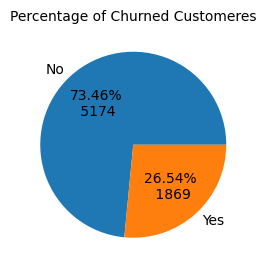

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = lambda p:f"{p:.2f}%\n {round(p*sum(gb['Churn'])/100)}")
plt.title("Percentage of Churned Customeres", fontsize = 10)
plt.show()
plt.tight_layout()
plt.savefig("images/01_Percentage of Churned Customeres.png", dpi=300, bbox_inches='tight')

**Insight: Overall Churn Rate**

The visualization clearly shows that the majority of customers are loyal, but the churn rate is significant and should be addressed.

**No Churn (Loyal Customers)**: Approximately 73.5% of the customer base stayed with the company.

**Yes Churn (Lost Customers)**: Approximately 26.5% of the customer base churned.

**Key Takeaway**: One out of every four customers is leaving the company. This rate is high for a subscription business and represents a significant loss of potential revenue, making churn prediction and prevention a critical business priority.

### Churn by Gender

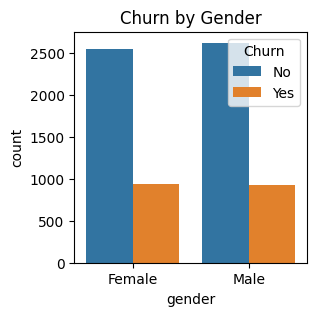

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize = (3,3))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()
plt.tight_layout()
plt.savefig("images/02_churn_by_gender.png", dpi=300, bbox_inches='tight')

**Insight: Churn by Gender**

The visualization indicates that gender is not a significant driver of churn for this customer base.

The percentage of Female customers who churned is virtually the same as the percentage of Male customers who churned.

**Key Takeaway**: Retention strategies should not be segmented based on gender as both groups exhibit the same likelihood of churning. Resources should be focused on identifying other, more influential factors (like contract type or services) to predict and prevent churn.

### Numbers of Customers by Senior Citizen

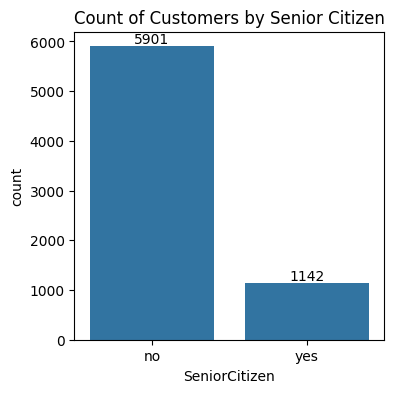

In [30]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

**Insight: Customer Count by Senior Citizen Status**

The vast majority of the customer base consists of non-senior citizens.

**Non-Senior Citizens (No)**: This group makes up the overwhelming majority, comprising around 84% of the total customer base.

**Senior Citizens (Yes)**: This group is a small minority, representing about 16% of the total customer base.

### Churn by Senior Citizen

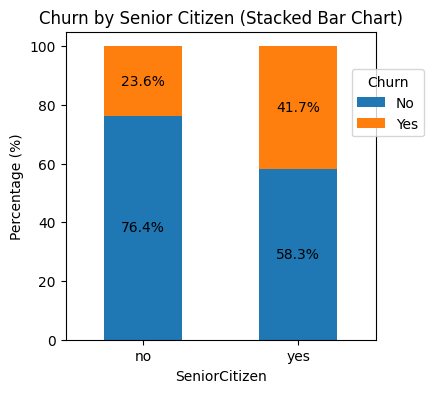

In [10]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location
plt.show()

**Insight: Churn by Senior Citizen Status**

Senior citizens are significantly more likely to churn than non-senior citizens.

**Non-Senior Citizens (No)**: This large group has a relatively low churn rate (the "Yes" churn portion is much smaller than the "No" portion).

**Senior Citizens (Yes)**: This smaller group shows a disproportionately high churn rate. Nearly half of the senior citizens in the dataset are churning (the "Yes" churn portion is almost as large as the "No" portion).

**Key Takeaway**: Retention efforts should specifically target the Senior Citizen demographic. This group represents a high-risk segment, suggesting their needs (which may relate to ease-of-use, customer support, or pricing) are not being met effectively.

### Number of Tenure by Churn

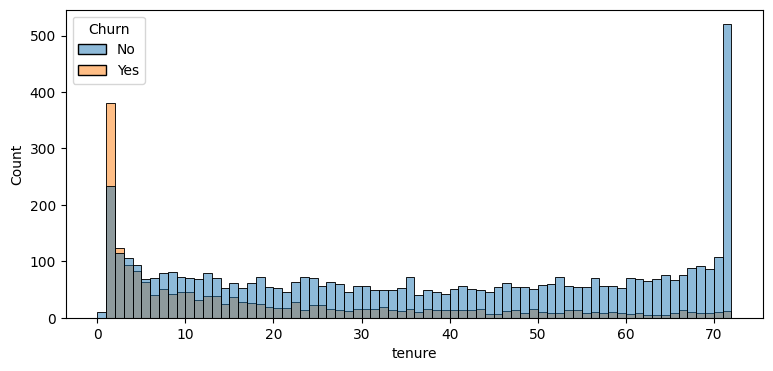

In [49]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

**Insight: Churn by Customer Tenure (Loyalty)**

New customers are the highest-risk group for churn.

**High Churn for Low Tenure**: The vast majority of customers who churned (the blue "Yes" bars) are heavily concentrated in the lowest tenure groups (1-12 months).

**Low Churn for High Tenure**: As tenure increases (e.g., 61-72 months), the number of churning customers drops dramatically, and the total customer count in that segment is dominated by loyal customers (the orange "No" bars).

**Key Takeaway**: The first year of a customer relationship is the most critical period for retention. The company should focus immediate intervention efforts (e.g., proactive customer support, onboarding programs, introductory incentives) on customers who are within their first 12 months of service.

### Number of Customers Churn by Contract 

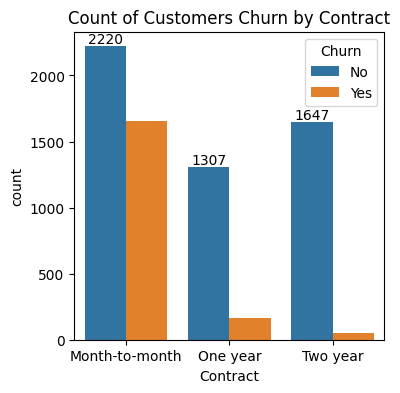

In [47]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers Churn by Contract")
plt.show()

**Insight: Churn by Contract Type**

The contract type is the single largest driver of customer churn.

**Month-to-month Contract is the Highest Risk**: Customers on a Month-to-month contract are by far the most likely to churn. The count of churning customers (the blue 'Yes' segment) in this group is massive, representing almost all the total churn in the dataset.

**Longer Contracts Ensure Loyalty**: Customers on One year and especially Two year contracts show significantly lower churn rates. The 'Yes' (churn) segment for the Two year contract is almost non-existent.

**Key Takeaway**: To drastically reduce the overall churn rate, the company must focus on migrating Month-to-month customers to longer-term contracts (One year or Two year) by offering compelling incentives or discounts. These longer contracts act as a strong commitment mechanism, ensuring customer loyalty.

### Number of Churn by 
#### 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'

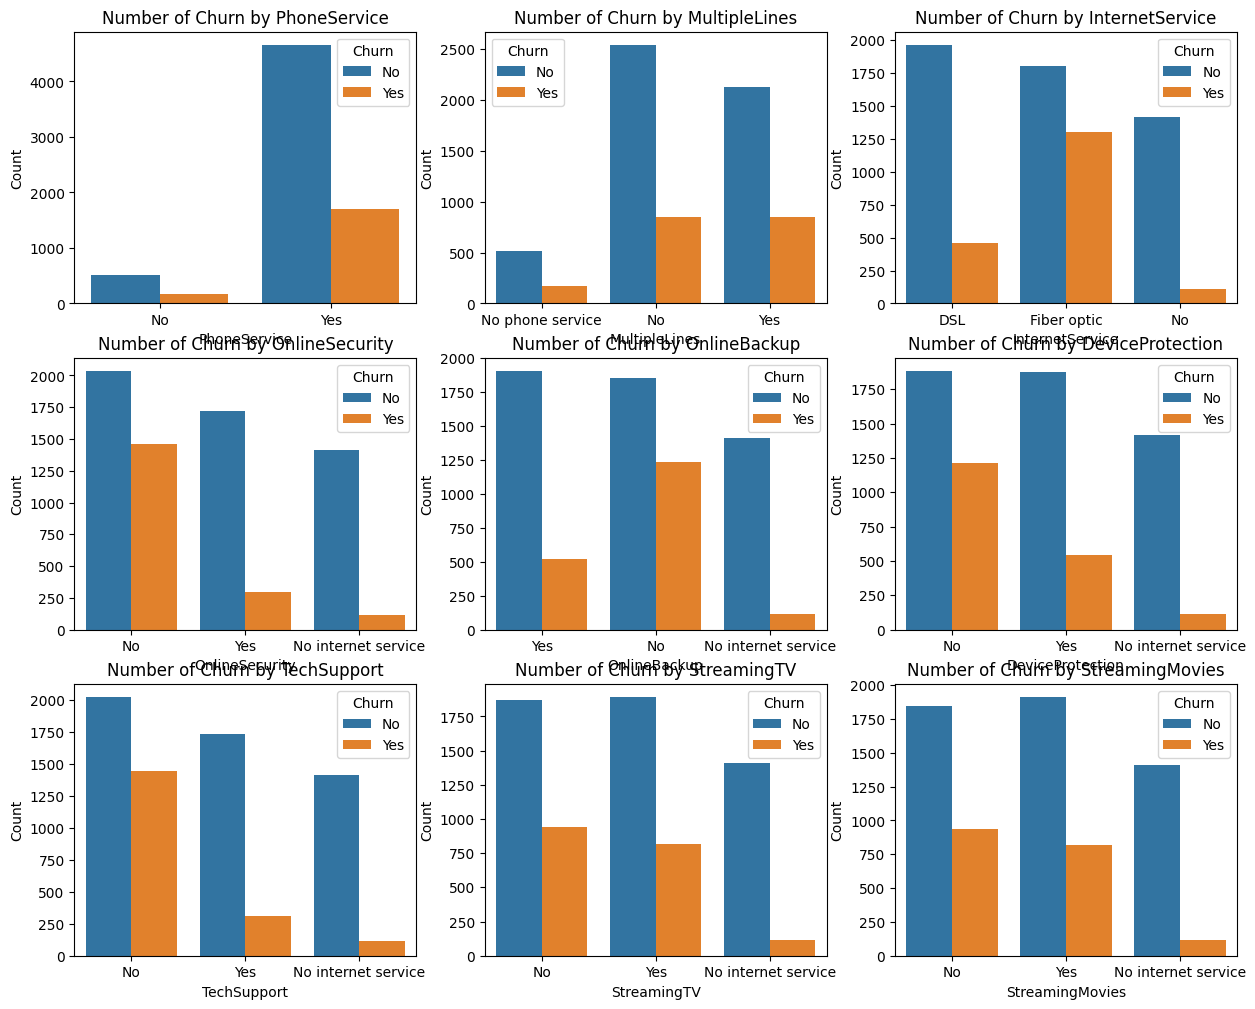

In [20]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Number of Churn by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.show()

**Insides :**

**PhoneService :** Having Phone Service does not significantly change the likelihood of churn, as the proportion of churn ('Yes') to non-churn ('No') is similar regardless of having the service.

**MultipleLines :** Churn is roughly proportional to the customer base, meaning having Multiple Lines does not prevent churn or make it significantly worse.
**InternetService :**	Fiber Optic is the highest-risk service; customers using it churn at a disproportionately high rate, indicating dissatisfaction with this premium product. Customers with No internet service have the lowest churn.

**OnlineSecurity :** Customers without Online Security have a much higher churn rate than those who have it. This security service acts as a powerful retention mechanism.

**OnlineBackup :** Customers without Online Backup are more likely to churn, though the effect is less severe than the lack of Online Security.

**DeviceProtection :** The lack of Device Protection correlates with a slightly higher churn rate, showing a minor contribution to customer stickiness.

**TechSupport :**	The absence of Tech Support is a major churn driver, mirroring the effect of Online Security. Customers without technical assistance are much more likely to leave.

**StreamingTV :** Having Streaming TV slightly improves retention, as customers without the service are marginally more likely to churn.

**StreamingMovies :**	Similar to Streaming TV, having Streaming Movies provides a small bump in loyalty, but it is not a major factor.

### Churned Customers by Payment Method

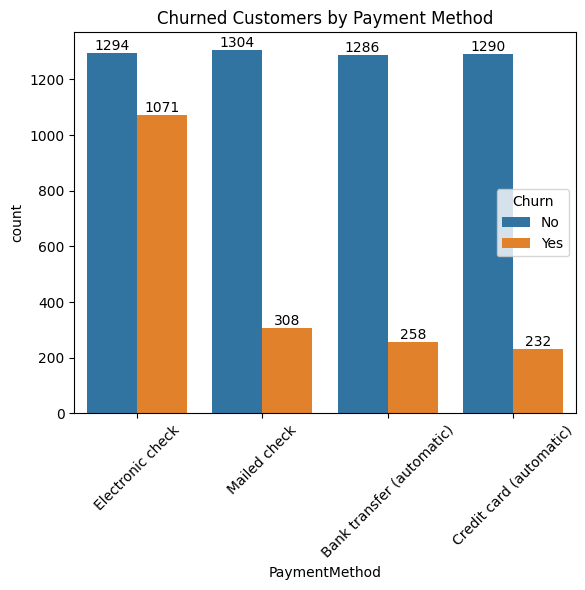

In [53]:
plt.figure(figsize = (6,6))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

**Insight: Churn by Payment Method**

Customers using Electronic Check are significantly more likely to churn than those using other payment methods.

**Highest Risk**: The Electronic Check method has the largest number of churning customers (the blue 'Yes' segment) both in absolute count and relative to its non-churning count. This payment method indicates the weakest customer loyalty.

**Lowest Risk**: Automatic payment methods, particularly Credit Card (automatic) and Bank Transfer (automatic), have much higher retention rates (smaller blue 'Yes' segment relative to the total bar).

**Key Takeaway**: The company should investigate why customers paying via Electronic Check are so prone to leaving. Retention campaigns could be launched to incentivize these customers to switch to an automatic payment method, which is strongly correlated with higher loyalty.

### 🏁 Final Conclusion: 

The analysis confirms the company has a serious retention issue, with an overall **churn rate of approximately 26.5%**. The loss is heavily concentrated and predictable, driven primarily by three critical factors:

#### 1. The Loyalty Gap: Contract and Tenure

 - **Month-to-month contracts** are the primary churn driver, demonstrating the lowest customer commitment.

 - **New customers (low tenure)** are the most likely to leave, indicating a failure in early customer experience.

#### 2. Value Deficiency: Support and Security

 - Customers who churn are overwhelmingly those **without Tech Support and Online Security**.These critical supplementary services are key to building trust and loyalty.

#### 3. Service Mismatch: Fiber Optic Dissatisfaction

 - **Fiber Optic** customers—who pay for a premium, high-speed product—churn at a disproportionately high rate. This suggests dissatisfaction with service reliability or a poor value-for-money perception when essential support is lacking.

 - **Senior Citizens** and customers using **Electronic Check** are also high-risk segments.

#### Strategic Priority

To effectively reduce churn, the company must focus on **migrating customers to longer contracts** and aggressively **bundling Tech Support and Online Security** into all high-cost, high-expectation Fiber Optic plans.